test r2 score 0.5407556587818749


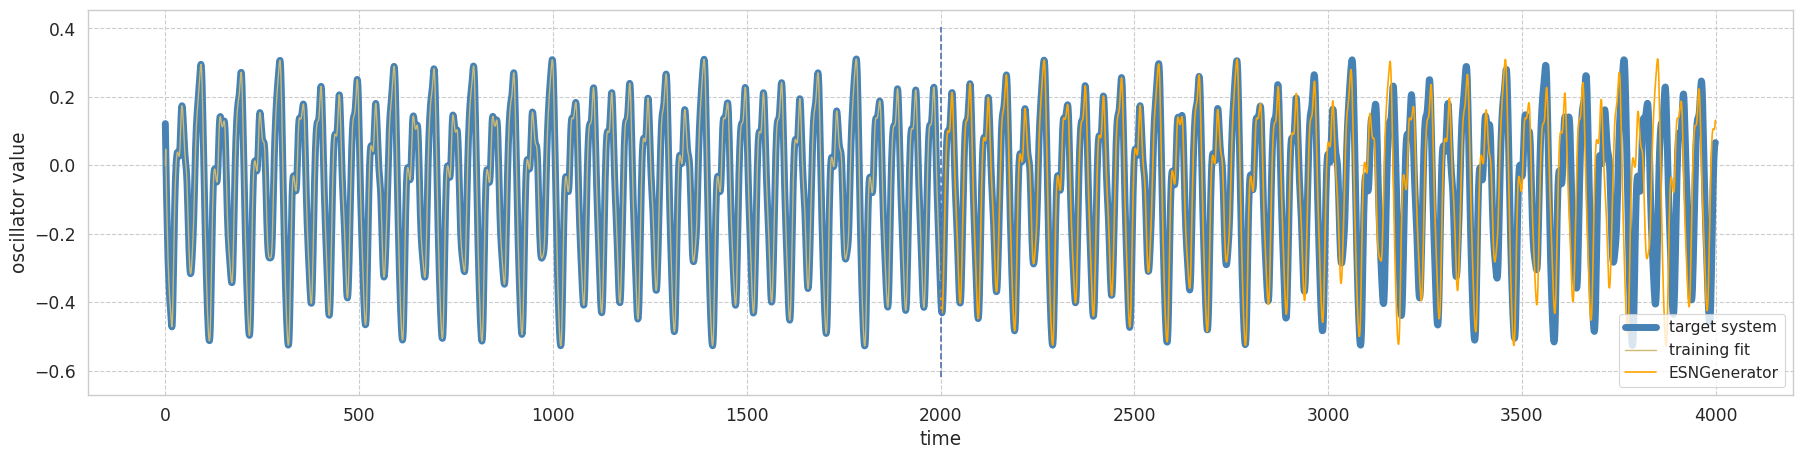

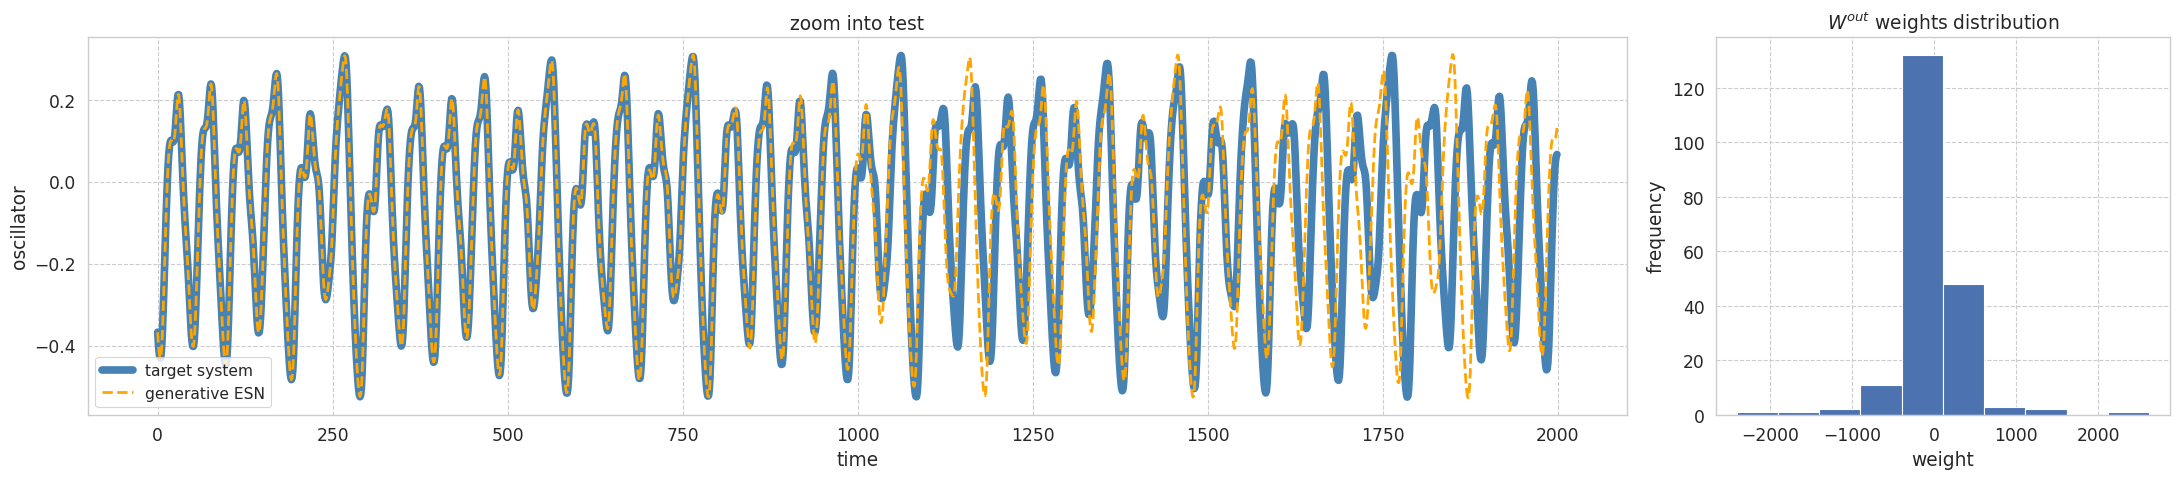

In [1]:
"""
=========================================================
ESNGenerator example
=========================================================

This example shows how to use Echo State Networks as 
pattern generator to produce a [Mackey-Glass system](http://www.scholarpedia.org/article/Mackey-Glass_equation).

We try to predict the future steps of a chaotic time series. 
For testing, we use the Echo State Network in "generative mode",
which means, we do not have any input (only the bias) and the output 
is fed back into the network for producing the next time step.

Several parameter used in the example are arbitrary and even
not so conventional (e.g., spectral radius > 1), just 
just for the sake of the example. 
Other constellations produce satisfactory results too, 
so feel free to play around with them.
"""
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from echoes import ESNGenerator
from echoes.datasets import load_mackeyglasst17
from echoes.plotting import plot_predicted_ts, set_mystyle

set_mystyle()  # optional, set aesthetics


# Load and split data
mackey_ts = load_mackeyglasst17()
n_train_steps, n_test_steps = 2000, 2000
n_total_steps = n_train_steps + n_test_steps

y_train, y_test = train_test_split(
    mackey_ts, 
    train_size=n_train_steps, 
    test_size=n_test_steps, 
    shuffle=False
)

esn = ESNGenerator(
    n_steps=n_test_steps,
    n_reservoir=200,
    spectral_radius=1.25,   
    leak_rate=.4,
    random_state=42,
)
# Fit the model. Inputs is None because we only have the target time series
esn.fit(X=None, y=y_train)

y_pred = esn.predict()
print("test r2 score", r2_score(y_test, y_pred))

# Plot training and test
plt.figure(figsize=(22, 5))
plt.plot(mackey_ts[: n_total_steps], 'steelblue', linewidth=5, label="target system")
plt.plot(esn.training_prediction_, color="y", linewidth=1, label="training fit")
plt.plot(range(n_train_steps, n_total_steps), y_pred,'orange', label="ESNGenerator")
plt.ylabel("oscillator value")
plt.xlabel('time')
lo, hi = plt.ylim()
plt.vlines(n_train_steps, lo-.05, hi+.05, linestyles='--')
plt.legend(fontsize='small')

# Plot test alone
plt.figure(figsize=(22, 5))
plt.subplot(1, 4, (1, 3))
plt.title("zoom into test")
plt.plot(y_test,
         color="steelblue",
         label="target system", 
         linewidth=5.5)
plt.xlabel('time')

plt.plot(y_pred, 
         linestyle='--',
         color="orange", 
         linewidth=2,
         label="generative ESN",)
plt.ylabel("oscillator")
plt.xlabel('time')
plt.legend(fontsize='small')

plt.subplot(1, 4, 4)
plt.title(r"$W^{out}$ weights distribution")
plt.xlabel('weight')
plt.ylabel('frequency')
plt.hist(esn.W_out_.flat)
plt.tight_layout();